In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


* Reading the Dataset using Pandas read_csv method,each values in the rows has been separated by ;.
* Date and time has parsed together as used as index instead of Row Numbering

In [2]:
dataset = pd.read_csv("I:\ML\household_power_consumption.txt", sep=';', header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

C:\Users\AMITAVA\AppData\Local\Temp\ipykernel_1732\486233434.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("I:\ML\household_power_consumption.txt", sep=';', header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])


*  The dataset includes measures about specific energy uses.

* The documentation identifies the following variables of interest:

* global_active_power: The total active power consumed by the household (kilowatts).

* global_reactive_power: The total reactive power consumed by the household (kilowatts). voltage: Average voltage (volts).

* global_intensity: Average current intensity (amps).

* sub_metering_1: Active energy for kitchen (watt-hours of active energy).

* sub_metering_2: Active energy for laundry (watt-hours of active energy).

* sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

In [3]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
print(f"The Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

The Dataset has 2075259 rows and 7 columns


In [6]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [8]:
dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [9]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [10]:
missing_value_df

,percent_missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [11]:
dataset1 = dataset.dropna(how = 'any')

In [12]:
dataset1.shape

(2049280, 7)

In [13]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [14]:
dataset.replace('?', np.nan, inplace=True)

In [15]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataset = dataset.dropna(how = 'all')

In [17]:
for i in dataset.columns:
    dataset[i] = dataset[i].astype('float64')
#dataset = dataset.astype('float32')

In [18]:
dataset.shape

(2049280, 7)

In [19]:
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [20]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object

In [21]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

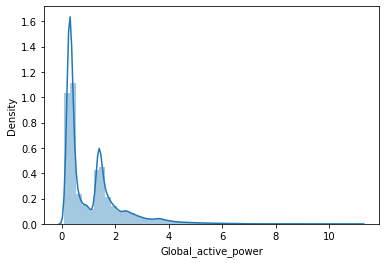

In [22]:
sns.distplot(dataset['Global_active_power'])

C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power'>

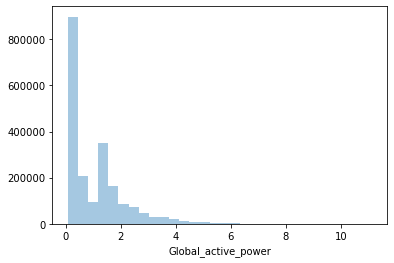

In [23]:
sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

<AxesSubplot:xlabel='Global_reactive_power'>

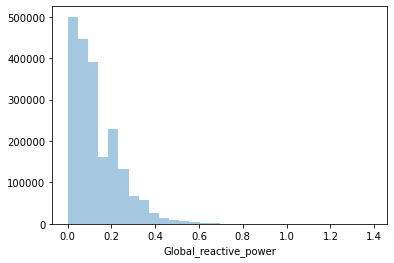

In [24]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

<AxesSubplot:xlabel='Voltage', ylabel='Density'>

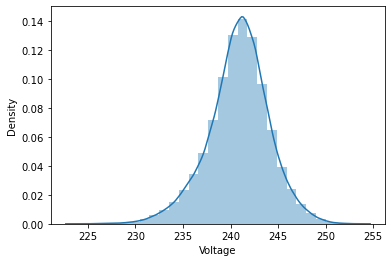

In [25]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

C:\Users\AMITAVA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_intensity', ylabel='Density'>

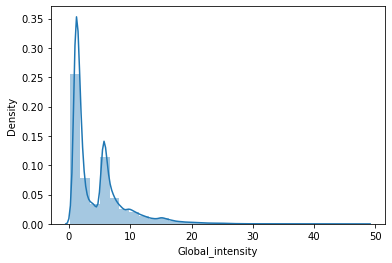

In [26]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

In [27]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


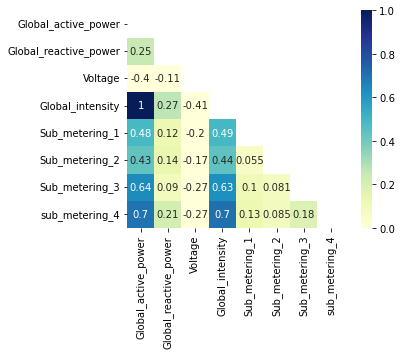

In [28]:
pearson = dataset.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

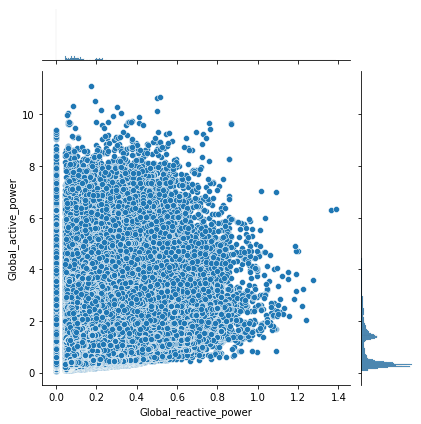

In [29]:
sns.jointplot( x = 'Global_reactive_power' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

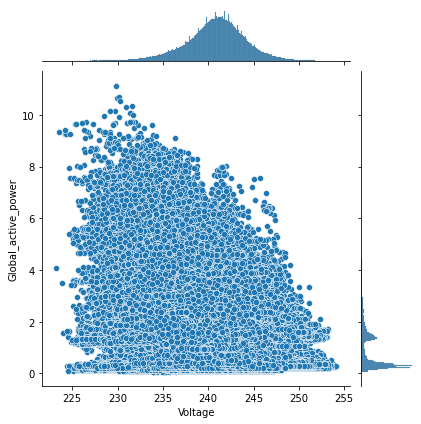

In [30]:
sns.jointplot( x = 'Voltage' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

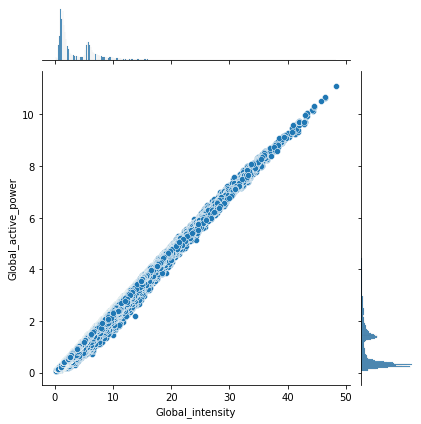

In [31]:
sns.jointplot( x = 'Global_intensity' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

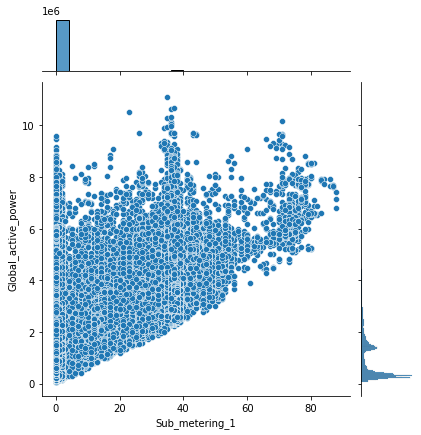

In [32]:
sns.jointplot( x = 'Sub_metering_1' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

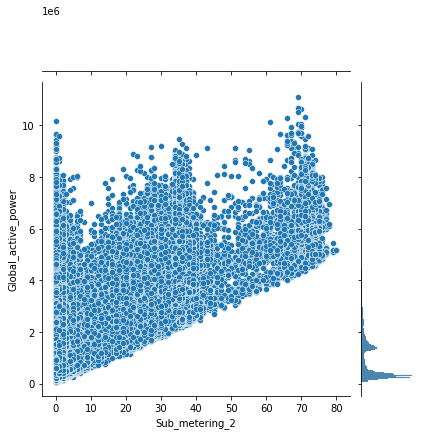

In [33]:
sns.jointplot( x = 'Sub_metering_2' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

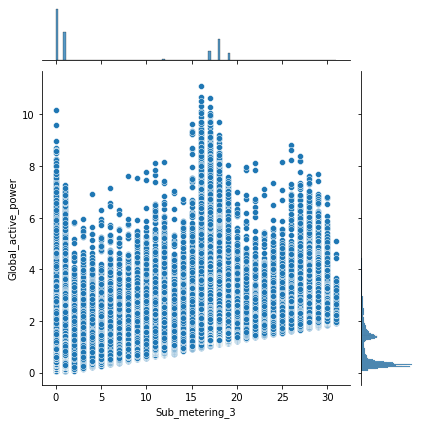

In [34]:
sns.jointplot( x = 'Sub_metering_3' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

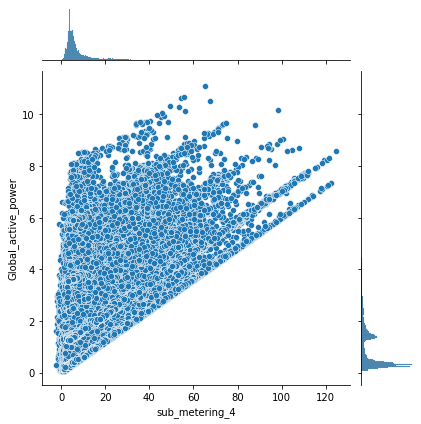

In [35]:
sns.jointplot( x = 'sub_metering_4' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

In [36]:
X = dataset.iloc[:,[1,3,4,5,6]]
y = dataset.iloc[:,0]

In [37]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


In [38]:
y.head()

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [39]:
type(X)

pandas.core.frame.DataFrame

In [40]:
type(y)

pandas.core.series.Series

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1434496, 5)
(614784, 5)
(1434496,)
(614784,)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.17597046  0.23668058 -0.00029877 -0.00040084  0.00216141]


In [48]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

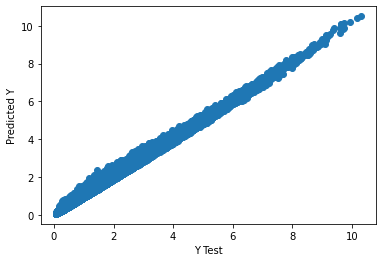

In [49]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ('R Squares value:',metrics.r2_score(y_test, predictions))

MAE: 0.027455608456450387
MSE: 0.0018226463072696978
RMSE: 0.04269246194903379
R Squares value: 0.9983631695586828


In [51]:
lm.score(X_test, y_test)

0.9983631695586828

In [52]:
from sklearn.linear_model import Lasso

In [53]:
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train,y_train)

Lasso(alpha=0.00099, max_iter=50000)

In [54]:
lasso_pred = lm.predict(X_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test,lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test,lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))
print ('R Squares value:',metrics.r2_score(y_test,lasso_pred))

MAE: 0.027455608456450387
MSE: 0.0018226463072696978
RMSE: 0.04269246194903379
R Squares value: 0.9983631695586828


In [56]:
regr.score(X_test, y_test)

0.9982852641936618

In [57]:
from sklearn.linear_model import Ridge

In [58]:
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train)

Ridge()

In [61]:
ridge_pred = clf.predict(X_test)
clf.score(X_test, y_test)
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('R Squares value:',metrics.r2_score(y_test, ridge_pred))

MAE: 0.02745562826722598
MSE: 0.0018226463893697004
RMSE: 0.04269246291056186
R Squares value: 0.9983631694849527


In [62]:
from sklearn.linear_model import ElasticNet

In [64]:
regr = ElasticNet(random_state=0)
regr.fit(X_train,y_train)

ElasticNet(random_state=0)

In [66]:
ridge_pred = regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('R Squares value:',metrics.r2_score(y_test, ridge_pred))
regr.score(X_test, y_test)

MAE: 0.10270651521472923
MSE: 0.021218218001297456
RMSE: 0.14566474522442777
R Squares value: 0.9809449452718803


0.9809449452718803

In [67]:
from sklearn.svm import SVR

In [68]:
regr = SVR()

In [ ]:
regr.fit(X_train,y_train)

In [ ]:
ridge_pred = regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('R Squares value:',metrics.r2_score(y_test, ridge_pred))
regr.score(X_test, y_test)